## Part III: Linear & Ridge Regression using OLS

Dataset used: Wine Data

1. Import Libraries and read dataset

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [28]:
# Read data

wine_data = pd.read_csv('./preprocessed/wine_data_preprocessed.csv')

In [29]:
# Data is already preprocessed, except Normalization
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type_white,wine_type_red
0,7.0,0.17,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,1,0
1,7.7,0.64,0.21,2.20,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,0,1
2,6.8,0.39,0.34,7.40,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,1,0
3,6.3,0.28,0.47,11.20,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,1,0
4,7.4,0.35,0.20,13.90,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,1,0
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,1,0
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,1,0
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,1,0


2. Choosing target Y and split the dataset

- Here in this case I choose quality of the wine as target value. 
- So this problem becomes a Linear Regression problem where the prodicted value is in the range of 0 (very bad) and 10 (excellent).

In [30]:
# Reusing my code from Part II

copy_wine_data = wine_data

# Split data into 80% training and 20% testing set
training_set = copy_wine_data.sample(frac=0.8, random_state=42)
test_set = copy_wine_data.drop(training_set.index)

print("train data shapes: ", training_set.shape)
print("test data shapes: ", test_set.shape)



train data shapes:  (5198, 14)
test data shapes:  (1299, 14)


3. Normalize

In [31]:
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

In [32]:
# Normalize these features 
for column in ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'pH']:
    training_set[column] = normalize(training_set[column])

for column in ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'pH']:
    test_set[column] = normalize(test_set[column])

In [33]:
# Create Train set and Test set

x_train = training_set.drop('quality', axis=1)
y_train = training_set['quality']

x_test = test_set.drop('quality', axis=1)
y_test = test_set['quality']

print("train data shapes: ", x_train.shape, y_train.shape)
print("test data shapes: ", x_test.shape, y_test.shape)

train data shapes:  (5198, 13) (5198,)
test data shapes:  (1299, 13) (1299,)


4. Linear Regression using OLS

In [34]:
class LinRegressionOls():
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Add ones to starting row to handle bias term
        X = np.column_stack((np.ones(X.shape[0]), X))
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.weights = w
        return 
    
    def predict(self, X):
        X = np.column_stack((np.ones(X.shape[0]), X)) # Handle bias term
        return np.dot(X, self.weights.T)
        # return X @ self.weights
    
    def compute_mse(self, y_true, y_pred):
        mse = np.mean((y_true - y_pred)**2)
        return mse


In [35]:
wine_model = LinRegressionOls() # Create Wine model

wine_model.fit(x_train, y_train)

In [36]:
wine_model.weights

array([ 2845.25366211,   -36.52566903,    23.07420579,    10.02678861,
          23.72253902,   -78.28843498,     4.74305604,    -5.94617546,
       -2517.40895504,    13.29145018,     5.78417745,   -19.07529255,
        -340.35839844,  -336.26708984])

In [37]:
y_pred_linear = wine_model.predict(x_test)
y_pred_linear

array([ 9.64620519, -1.02723646,  5.9479089 , ..., -6.2039109 ,
        3.46106452, -1.14839239])

In [38]:
y_pred_linear = np.array(y_pred_linear) # Convert into numpy arrays for plotting purpose
y_test_linear = np.array(y_test)

In [39]:
mse = wine_model.compute_mse(y_test_linear, y_pred_linear)  # Compute MSE
mse

78.14900823978043

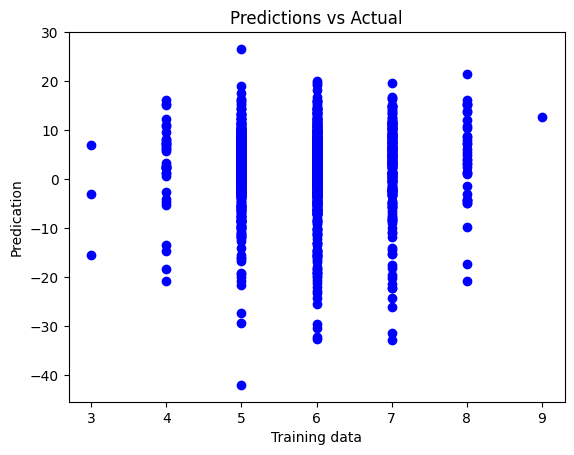

In [40]:
# Plot actual targets vs predictions
plt.scatter(y_test_linear, y_pred_linear, color="blue", label="Actual targets")
# plt.plot(x_test, y_pred, color="red", label="Predictions")
plt.xlabel("Training data")
plt.ylabel("Predication")
plt.title("Predictions vs Actual")
plt.show()

### 5. Ridge Regression using OLS

In [41]:
# Reusing code from Linear Regression using OLS

class RidgeRegressionOls():
    def __init__(self):
        self.weights = None
        self.lam = None

    def fit(self, X, y, lam):
        self.lam = lam
        X = np.column_stack((np.ones(X.shape[0]), X)) # Bias Term
        I = np.eye(X.shape[1])
        I[0, 0] = 0  # Do not regularize the bias term
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + self.lam*I), X.T), y)
        self.weights = w
        return 
    
    def predict(self, X):
        X = np.column_stack((np.ones(X.shape[0]), X))
        return np.dot(X, self.weights.T)
    
    def compute_mse(self, y_true, y_pred):
        mse = np.mean((y_true - y_pred)**2) + 0.5*self.lam*np.dot(self.weights.T, self.weights)
        return mse


In [42]:
print("training data shape : ", x_test.shape, y_test.shape)

training data shape :  (1299, 13) (1299,)


In [43]:
wine_model_ridge = RidgeRegressionOls() # Creare ridge regression model

wine_model_ridge.fit(x_train, y_train, 0.04) # 

In [44]:
wine_model_ridge.weights # print weights

array([10.44262645, -0.01321976, -1.55423499, -0.06682495,  0.57007166,
       -0.96153508,  0.90933127, -0.40919876, -5.30181162,  0.12394564,
        0.56241178,  2.27766929, -0.10291712,  0.10291712])

In [45]:
y_pred_ridge = wine_model_ridge.predict(x_test)
y_pred_ridge

array([5.80603915, 5.46427111, 6.38522089, ..., 6.81745163, 5.27846636,
       6.93200773])

In [46]:
y_pred_ridge = np.array(y_pred_ridge)
y_test_ridge = np.array(y_test)

In [47]:
mse = wine_model_ridge.compute_mse(y_test_ridge, y_pred_ridge)
mse

3.4643311639111185

In [48]:
# Finding perfect lambda value
model_test = RidgeRegressionOls()
perfect_lam = 0
min_mse = 100000 
lambda_value = []
mse_value = []
for l in np.arange(0, 1, 0.001):
    model_test.fit(x_train, y_train, l)
    y_pred_test = np.array(model_test.predict(x_test))
    y_test_test = np.array(y_test) 
    mse_test = model_test.compute_mse(y_test_test, y_pred_test)
    lambda_value.append(l)
    mse_value.append(mse_test)
    if mse_test < min_mse:
        min_mse = mse_test
        perfect_lam = l

print(f"Best Lambda = {perfect_lam}, minimum MSE = {min_mse}")

Best Lambda = 0.046, minimum MSE = 3.448860779236369


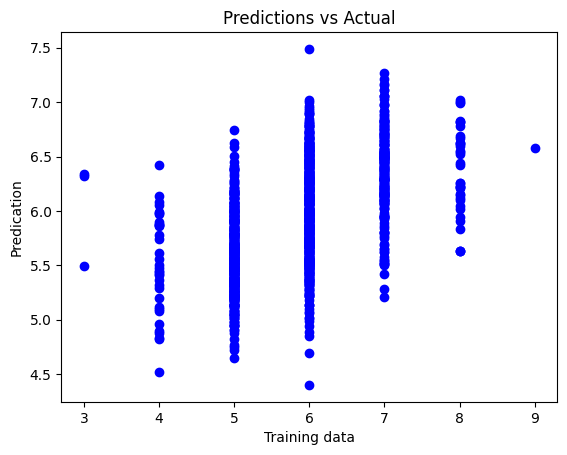

In [49]:
# Plot actual targets vs predictions
plt.scatter(y_test_ridge, y_pred_ridge, color="blue", label="Actual targets")
# plt.plot(x_test, y_pred, color="red", label="Predictions")
plt.xlabel("Training data")
plt.ylabel("Predication")
plt.title("Predictions vs Actual")
plt.show()

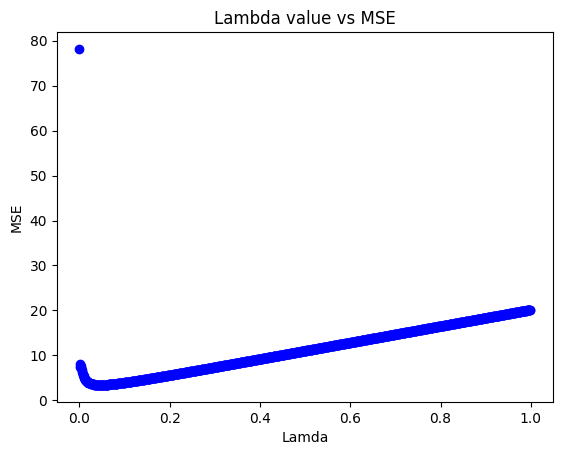

In [50]:
plt.scatter(lambda_value, mse_value, color="blue")
plt.xlabel("Lamda")
plt.ylabel("MSE")
plt.title("Lambda value vs MSE")
plt.show()

In [51]:
# for i in range(20):
#     print(y_test_ridge[i], y_pred_ridge[i])

In [52]:
# # Save weights as pickle file
# import pickle

# pickle.dump(wine_model_ridge.weights, open("weights.p", "wb" ))

# print("Weights stores as pickle file")
